In [1]:
from imblearn.over_sampling import ADASYN

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import LOM
from sklearn.cross_validation import train_test_split
from sklearn import metrics

 /m/home/home8/81/nautiys1/unix/jupyter/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


In [2]:
fname = "synthetic_control.data"
content = [line.strip() for line in open(fname)]
data = []
for c in content:
    data.append(np.array(c.split(' ')))
    newData = []
lens = []
for d in data:
    a = []
    for i,j in enumerate(d):
        if d[i] != '':
            a.append(float(d[i]))
    newData.append(a)
data = pd.DataFrame(newData)

In [5]:
converted = data.transpose()
#normalized = (converted - converted.mean())/(converted.max() - converted.min())
normalizedData = normalized.transpose()

### Experiment 1:
 - Classify single time series 
 - We try to classify one time series as one vs all 

In [4]:
def getClassification(k = 'IT'):
    classifier = {
        'N': 100,
        'C': 200,
        'IT':300,
        'DT':400,
        'US':500,
        'DS':600
    }
    A = np.ones(600)*-1
    A[classifier[k]-100:classifier[k]] = 1
    return A

### Try to find increasing Trend

In [5]:
data['Result'] = getClassification()
data = data.sample(frac=1)

In [6]:
from sklearn.cross_validation import train_test_split
Y_train, Y_test, L_train, L_test = train_test_split(data[data.columns[0:60]], data['Result'], test_size=0.4, random_state=0)

In [7]:
import pickle
f = open("Y_train.pickle","wb")
pickle.dump(Y_train.as_matrix(),f)
f.close()
f = open("L_train.pickle","wb")
pickle.dump(L_train.as_matrix(),f)
f.close()
f = open("Y_test.pickle","wb")
pickle.dump(Y_test.as_matrix(),f)
f.close()
f = open("L_test.pickle","wb")
pickle.dump(L_test.as_matrix(),f)
f.close()

In [8]:
C = 1
N = 60
S = Y_train.shape[0]
myModel = LOM.LOM(Y=Y_train.as_matrix(),L=L_train.values,N=N,C=1,S=S)
myModel.fit(n=60,P=3,iters=200,kernels=[],ls=3)
#result = myModel.predict(Ytest=Y_test.values) 
result,lHat,_ = myModel.predict(Ytest=Y_test.values) 
metrics.f1_score(y_pred=result,y_true=L_test.values)

Concatenated Latent Gaussian Processes:
(180, 180) (180, 180) 0 20 40 60 80 100 120 140 160 180

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning:F-score is ill-defined and being set to 0.0 due to no predicted samples.


0.0

(array([  2.,   1.,   1.,   8.,  98.,  56.,   8.,   2.,   2.,   2.]),
 array([-0.56167953, -0.44749723, -0.33331493, -0.21913263, -0.10495033,
         0.00923197,  0.12341427,  0.23759657,  0.35177887,  0.46596117,
         0.58014347]),
 <a list of 10 Patch objects>)

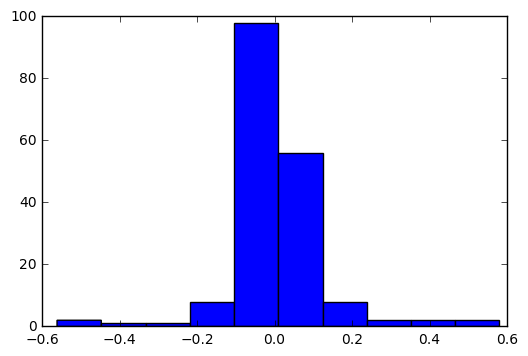

In [17]:
plt.hist(myModel.WHatExp.T)

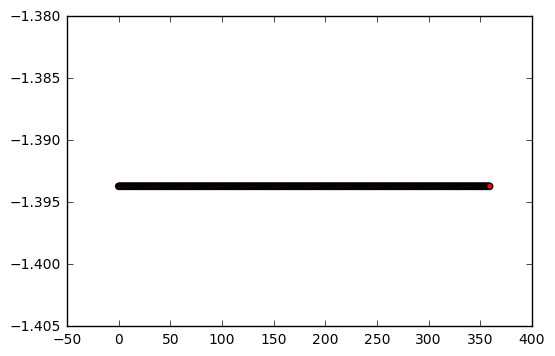

In [14]:
def getColor(L):
    if L == 'IT':
        return 'b'
    else:
        return 'r'
    
plt.scatter(range(lHat.shape[0]),lHat,c=[getColor(l) for l in L_train.values])
        

## It overfits to the negative examples due to high imbalance, we try to cure imbalance by oversampling the positive class

In [11]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
Y_resampled, L_resampled = smote.fit_sample(Y_train, L_train)
myModel = LOM.LOM(Y=Y_resampled,L=L_resampled,N=N,C=1,S=Y_resampled.shape[0])
myModel.fit(n=60,P=4,iters=200,kernels=[],ls=3)
result = myModel.predict(Ytest=Y_test.values) 
metrics.f1_score(y_pred=result[0],y_true=L_test.values)

Concatenated Latent Gaussian Processes:
(240, 240) (240, 240) 0 20 40 60 80 100 120 140 160 180

0.0

In [25]:
result = myModel.predict(Ytest=Y_train.values)

In [27]:
metrics.accuracy_score(y_pred=result[0],y_true=L_train.values)

0.84722222222222221

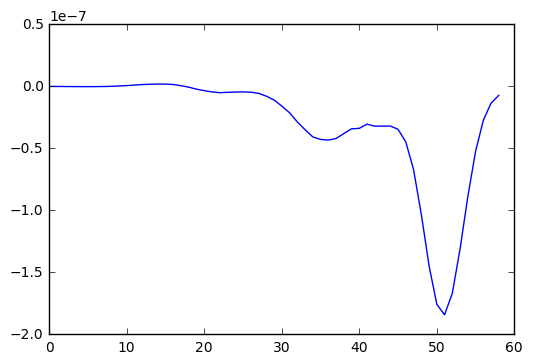

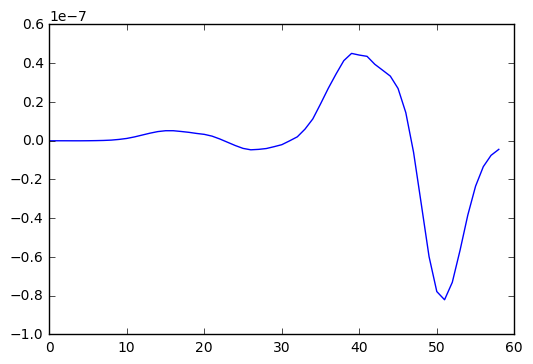

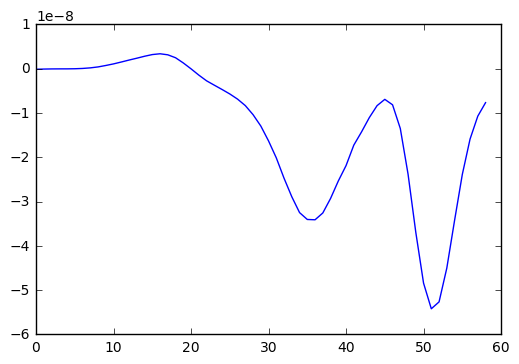

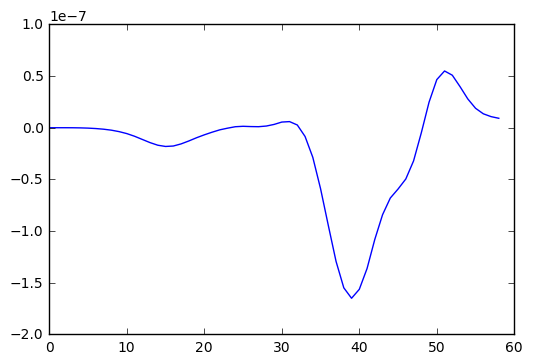

In [24]:
for p in range(myModel.P):
    plt.plot(infer[0,p*N:p*N+N-1].T)
    plt.show()

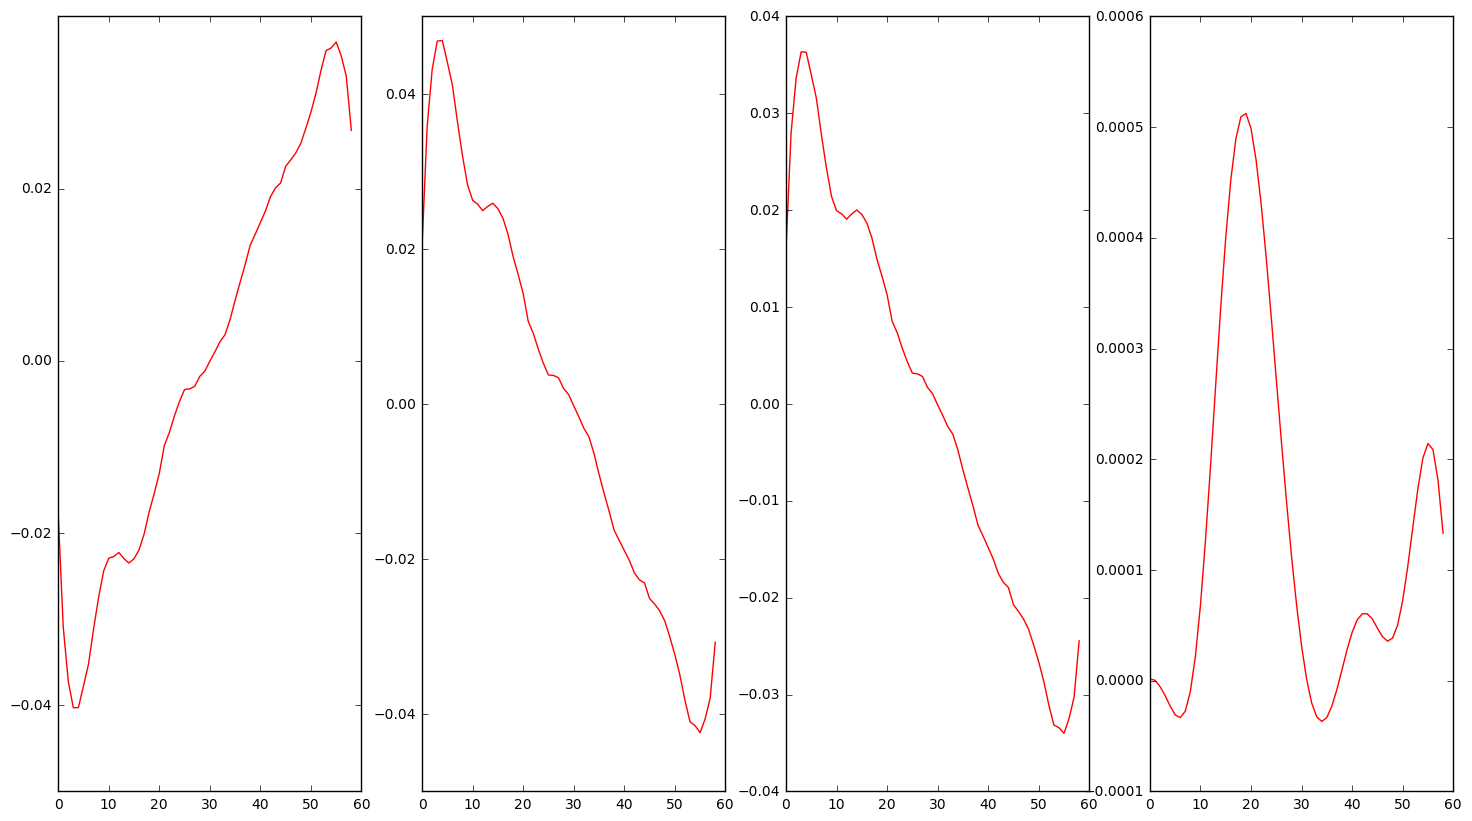

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=myModel.P,figsize=(18,10))
for p in range(myModel.P):
    axes[p].plot(myModel.uExpBar[0,p*N:p*N+N-1].T,c='r')

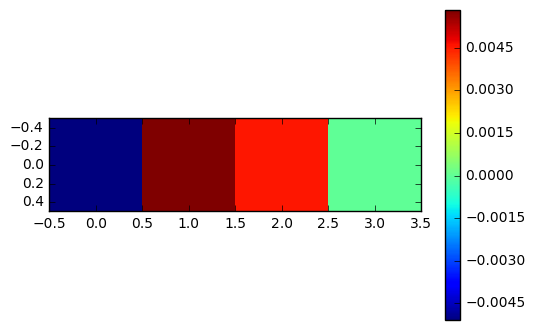

In [23]:
plt.imshow(myModel.phiHatExp,interpolation="none")
plt.colorbar()

In [28]:
## Linear increasing kernel
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
kenrel = GPy.kern.Linear(1,variances=3)  
kenrel = GPy.kern.Linear(1,variances=3) * GPy.kern.Matern52(1,variance=2,lengthscale=3) 
Matern1 = GPy.kern.PeriodicMatern32(1,lengthscale=3,variance=2)
Cosine1 = GPy.kern.Cosine(1,lengthscale=3,variance=2)
gaussian = GPy.kern.ExpQuad(1,lengthscale=3,variance=2)

In [34]:
def scale(d):
    return (d - d.min())/(d.max() - d.min())

def generatelatent(N,noiselevel=0.5):
    x = np.linspace(0,N-1,N)
    u1 = np.random.multivariate_normal(mean=np.zeros(N).flatten(),cov=kenrel.K(x.reshape(N,1))) + noiselevel* np.random.normal(0,1,N)
    u2 = np.random.multivariate_normal(mean=np.zeros(N).flatten(),cov=gaussian.K(x.reshape(N,1))) + noiselevel* np.random.normal(0,1,N)
    g1 = np.random.multivariate_normal(mean=np.ones(N).flatten(),cov=Matern1.K(x.reshape(N,1))) + noiselevel* np.random.normal(0,1,N)
    g2 = np.random.multivariate_normal(mean=np.ones(N).flatten(),cov=Cosine1.K(x.reshape(N,1))) + noiselevel*np.random.normal(0,1,N)
    return scale(u1),scale(u2),scale(g1),scale(g2)

def generateData(W,phi,latents,S=100,C=3,P=2,N=100):
    #phi = np.random.normal(loc=0,scale=1,size=(C,P))
    P = len(latents) -1
    phiBar = np.matrix(np.kron(phi,np.eye(N)))
    B = np.ones(S)
    #W = np.random.rand(P*N)
    uBar = np.matrix(np.ones((S,N*P)))
    l = np.zeros(S)
    L = np.zeros(S)
    for s in range(S):
        if np.random.rand() < 0.4:
            L[s] = 1
            us = np.hstack([a for i,a in enumerate(latents) if i!=1 ])
        else:
            L[s] = -1
            us = np.hstack([a for i,a in enumerate(latents) if i!=0 ])
        uBar[s,:] = us
        l[s] = np.dot(uBar[s,:] ,W) + B[s]
        #L[s] = guessLabel(l[s])
    #print S,C,P,N
    #print "\n--",uBar.shape,phiBar.shape
    YBar = uBar * phiBar.T + np.random.normal(0,1)
    #print YBar.shape
    return YBar,L,uBar

In [37]:
actualP=3
S=200
N = 60
latents = generatelatent(N)
W = np.random.rand(actualP*N)
phi = np.random.normal(loc=0,scale=1,size=(C,actualP))
YBar,L,_ = generateData(W,phi,latents=latents,C=C,N=N,P=actualP,S=S)

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning:covariance is not positive-semidefinite.
 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning:covariance is not positive-semidefinite.


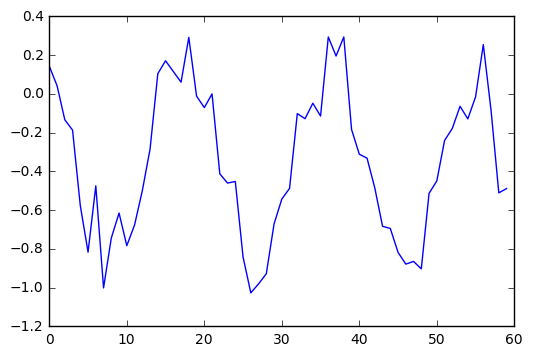

In [39]:
plt.plot(YBar[0].T)